In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [3]:
DS_PATH = '/home/dreamwall/StudyGB/DataSets/vgsales.csv'

In [4]:
ds = pd.read_csv(DS_PATH)
ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
ds.shape

(16598, 11)

In [6]:
ds.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


##### Предварительные задачи. Далее возможны изменения.
Проверить зависимости года выпуска игр и продаж в различных регионах.
Проверить зависимости жанров игр и их продаж в различных регионах.
Провести корреляционный анализ 
Построить доверительные интервалы для продаж в различных регионах.

In [8]:
ds = ds.fillna(ds.mean())
# замена NaN значений на средние

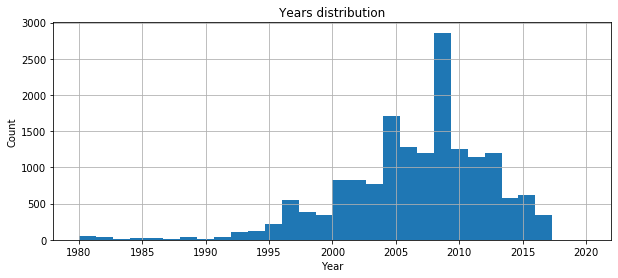

In [9]:
plt.figure(figsize = (10, 4))

ds['Year'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Years distribution')
plt.show()

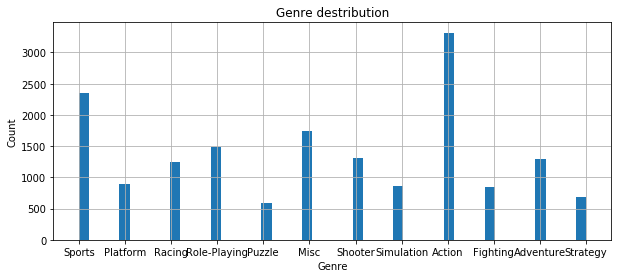

In [10]:
plt.figure(figsize = (10, 4))

ds['Genre'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Genre destribution')
plt.show()

Подготовка интересующих стобцов для анализа.

In [11]:
year = np.array(ds['Year'])
year

array([2006., 1985., 2008., ..., 2008., 2010., 2003.])

In [12]:
gs = np.array(ds['Global_Sales'])
gs

array([8.274e+01, 4.024e+01, 3.582e+01, ..., 1.000e-02, 1.000e-02,
       1.000e-02])

In [13]:
nas = np.array(ds['NA_Sales'])
nas

array([4.149e+01, 2.908e+01, 1.585e+01, ..., 0.000e+00, 0.000e+00,
       1.000e-02])

In [14]:
eus = np.array(ds['EU_Sales'])
eus

array([2.902e+01, 3.580e+00, 1.288e+01, ..., 0.000e+00, 1.000e-02,
       0.000e+00])

In [15]:
jps = np.array(ds['JP_Sales'])
jps

array([3.77, 6.81, 3.79, ..., 0.  , 0.  , 0.  ])

#### 1. Корреляционный анализ года выпуска и продаж в регионах EU, NA, JP

In [16]:
np.corrcoef(year, gs)

array([[ 1.        , -0.07463236],
       [-0.07463236,  1.        ]])

In [17]:
np.corrcoef(year, nas)

array([[ 1.        , -0.09119765],
       [-0.09119765,  1.        ]])

In [18]:
np.corrcoef(year, eus)

array([[1.        , 0.00600489],
       [0.00600489, 1.        ]])

In [19]:
np.corrcoef(year, jps)

array([[ 1.        , -0.16915871],
       [-0.16915871,  1.        ]])

Корреляции между годом выпуска и продажами не наблюдается. Т.к. коэффициент корреляции слишком мал.

#### 2. Проведение диспресионного анализа. Проверка различия средних продаж в регионах EU, NA, JP

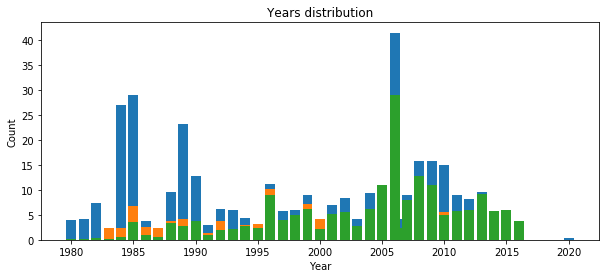

In [22]:
plt.figure(figsize = (10, 4))


plt.bar(year, nas)
plt.bar(year, jps)
plt.bar(year, eus)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Years distribution')
plt.show()

In [25]:
stats.f_oneway(nas, eus, jps)

F_onewayResult(statistic=436.9320561747085, pvalue=7.740499382751992e-189)

Т.к. pvalue очень маленькое, то лежит в области гипотезы Н1, следовательно средние значения продаж в данных регионах различаются.

#### 3. Проверка распределения продаж на "нормальность". Построение доверительных интервалов.
Н0 - распределение нормальное.

In [38]:
# Распределение продаж в NA
k2, p = stats.normaltest(nas)

alpha = 1e-3

print("p = {:g}".format(p))
p = 3.27207e-11

if p < alpha: 
    print("Нулевая гипотеза может быть отклонена")
else:
    print("Нулевая гипотеза не может быть отклонена")


p = 0
Нулевая гипотеза может быть отклонена


In [39]:
# Распределение продаж в EU
k2, p = stats.normaltest(eus)

alpha = 1e-3

print("p = {:g}".format(p))
p = 3.27207e-11

if p < alpha: 
    print("Нулевая гипотеза может быть отклонена")
else:
    print("Нулевая гипотеза не может быть отклонена")


p = 0
Нулевая гипотеза может быть отклонена


In [40]:
# Распределение продаж в JP
k2, p = stats.normaltest(jps)

alpha = 1e-3

print("p = {:g}".format(p))
p = 3.27207e-11

if p < alpha: 
    print("Нулевая гипотеза может быть отклонена")
else:
    print("Нулевая гипотеза не может быть отклонена")


p = 0
Нулевая гипотеза может быть отклонена


Нет возможности построить доверительные интервалы, т.к. распределение не нормально